In [1]:
# IMPORT PACKAGES

import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# DEFINE FILEPATHS

path_to_1D = "/home/hra35/Documents/events/1D_models"

path_to_esme_model = "/home/hra35/Documents/events/1D_models/reyk.vel"
path_to_rise_model = "/home/hra35/Documents/events/1D_models/RISE.vel"

picks_path = "/home/hra35/Documents/events/nll_script_outputs/D5_1Dinv/all_picks.txt" # picks entering the 1D inversion

list_of_models = ["sm_avg", "NEW_oneit", "NEW_avg_FINAL", "NEW_sm_avg"]

model_paths = []
for model in list_of_models:
    model_path = os.path.join(path_to_1D, "%s.vel" %model)
    model_paths.append(model_path)
    

In [3]:
# read Esme's model into dataframe
esme_df = pd.read_csv(path_to_esme_model, header = None, names = ["depth", "Vp", "Vs"], skiprows = 0, delimiter="\s+")

# read RISE model into dataframe
rise_df = pd.read_csv(path_to_rise_model, header = None, names = ["depth", "Vp", "Vs"], skiprows = 0, delimiter="\s+")

# read all other models into dataframes
model_dict = {}
for path in model_paths:
    model_df = pd.read_csv(path, header = None, names = ["depth", "Vp", "Vs"], skiprows = 0, delimiter="\s+")
    model_name = os.path.basename(path).split('.')[0]
    model_dict[model_name] = model_df

e_depth = esme_df['depth']
esme_Vp = esme_df['Vp']
esme_Vs = esme_df['Vs']

r_depth = rise_df['depth']
rise_Vp = rise_df['Vp']
rise_Vs = rise_df['Vs']


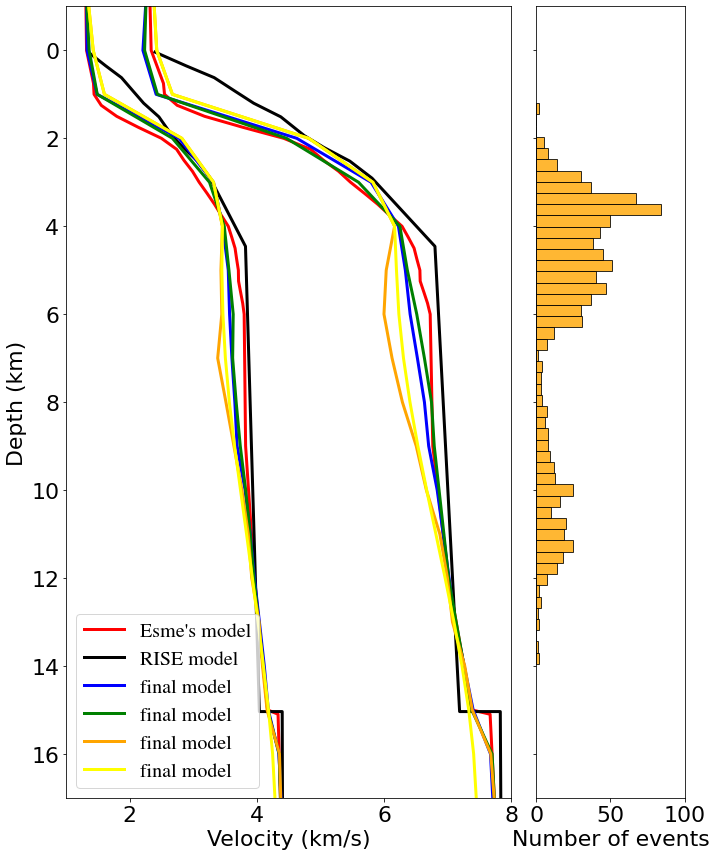

In [4]:
# PLOT THE MODELS

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 12), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# VELOCITY MODELS

plt.rcParams['font.family'] = 'Nimbus Roman'

ax1.plot(esme_Vp, e_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, label="Esme's model", color='red')
ax1.plot(esme_Vs, e_depth, marker='o',markersize=0.11, linestyle='-', linewidth=3, color='red')

ax1.plot(rise_Vp, r_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, label="RISE model", color='black')
ax1.plot(rise_Vs, r_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, color='black')

colours = ["blue", "green", "orange", "yellow", "brown", "grey", "purple"]

for model in list_of_models:
    ax1.plot(model_dict[model]['Vp'], model_dict[model]['depth'], marker='o',markersize=0.1, linestyle='-', linewidth=3, label="final model", color=colours[list_of_models.index(model)])
    ax1.plot(model_dict[model]['Vs'], model_dict[model]['depth'], marker='o',markersize=0.1, linestyle='-', linewidth=3, color=colours[list_of_models.index(model)])

ax1.set_ylim(-1,17)
#ax1.set_title('Velocity models', fontsize=16)
ax1.invert_yaxis()
ax1.set_xlim(1,8)
ax1.set_xlabel('Velocity (km/s)', fontsize=22)
ax1.set_ylabel('Depth (km)', fontsize=22)

ax1.tick_params(axis='x', labelsize=22)
ax1.tick_params(axis='y', labelsize=22) 

ax1.legend(fontsize=20)

# DEPTH DISTRIBUTION OF EVENTS

all_picks_df = pd.read_csv(picks_path, sep=r'\s+', skiprows=0, header=0)
all_picks_df.drop(["Weight", "NLL_res"], axis=1, inplace=True)

grouped_df = all_picks_df.groupby("event_ID")
event_df = pd.DataFrame(data=None, columns=["event_ID", "depth"])

for group_name, group_data in grouped_df:
    
    evname = str(group_name)
    evdepth = group_data["depth"].iloc[0]
    data_row = {"event_ID": str(evname), "depth": float(evdepth)}
    
    event_df = event_df.append(data_row, ignore_index=True)

ax2.hist(event_df['depth'], bins=50, orientation='horizontal', color='orange', edgecolor='k', alpha=0.8, align='right')
ax2.set_xlabel('Number of events', fontsize=22)
#ax2.set_title('Depth of events used for 1D inversion', fontsize=16)
ax2.set_ylim(-1, 17)
ax2.set_xlim(0, 100)
ax2.tick_params(axis='x', labelsize=22)
ax2.invert_yaxis()

plt.tight_layout()

plt.savefig('1Dmodels.png')

fig.show()

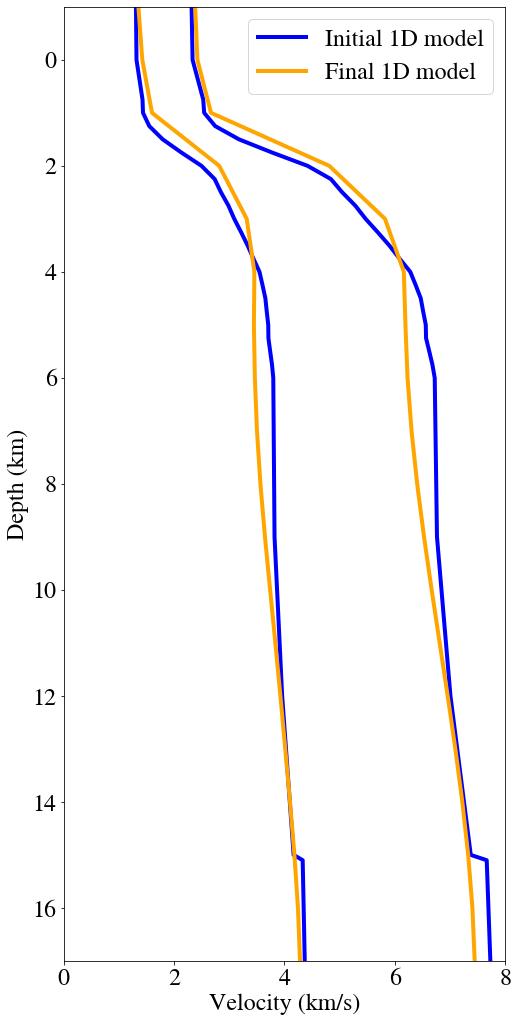

In [5]:
plt.figure(figsize=(7, 14))

# VELOCITY MODELS

plt.rcParams['font.family'] = 'Nimbus Roman'

#plt.plot(rise_Vp, r_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, label="RISE model", color='black')
#plt.plot(rise_Vs, r_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, color='black')

plt.plot(esme_Vp, e_depth, marker='o',markersize=0.1, linestyle='-', linewidth=4, label="Initial 1D model", color='blue')
plt.plot(esme_Vs, e_depth, marker='o',markersize=0.11, linestyle='-', linewidth=4, color='blue')

#model = list_of_models[0]
#plt.plot(model_dict[model]['Vp'], model_dict[model]['depth'], marker='o',markersize=0.1, linestyle='-', linewidth=3, label="initial refined model", color="red")
#plt.plot(model_dict[model]['Vs'], model_dict[model]['depth'], marker='o',markersize=0.1, linestyle='-', linewidth=3, color="red")

#model = list_of_models[1]
#plt.plot(model_dict[model]['Vp'], model_dict[model]['depth'], marker='o',markersize=0.1, linestyle='-', linewidth=3, label="average model from random models", color="green")
#plt.plot(model_dict[model]['Vs'], model_dict[model]['depth'], marker='o',markersize=0.1, linestyle='-', linewidth=3, color="green")

model = list_of_models[3]
plt.plot(model_dict[model]['Vp'], model_dict[model]['depth'], linestyle='-', linewidth=4, label="Final 1D model", color="orange")
plt.plot(model_dict[model]['Vs'], model_dict[model]['depth'], linestyle='-', linewidth=4, color="orange")

plt.ylim(-1,17)
#ax1.set_title('Velocity models', fontsize=16)
plt.gca().invert_yaxis()
plt.xlim(0,8)
plt.xlabel('Velocity (km/s)', fontsize=24)
plt.ylabel('Depth (km)', fontsize=24)

plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24) 

plt.legend(fontsize=24)

plt.tight_layout(pad=0)

plt.savefig('1Dmodels_report.png')

plt.show()

    depth        Vp        Vs     Vp/Vs
0   -10.0  2.383567  1.354533  1.759697
1    -1.0  2.383567  1.354533  1.759697
2     0.0  2.423533  1.425017  1.700705
3     1.0  2.669949  1.600906  1.667774
4     2.0  4.811987  2.818558  1.707251
5     3.0  5.822067  3.316577  1.755445
6     4.0  6.163266  3.455789  1.783461
7     5.0  6.192742  3.447145  1.796484
8     6.0  6.230519  3.464330  1.798477
9     7.0  6.303142  3.502803  1.799457
10    8.0  6.405113  3.565191  1.796569
11    9.0  6.529196  3.647654  1.789971
12   10.0  6.667507  3.740855  1.782348
13   11.0  6.812567  3.835565  1.776157
14   12.0  6.957739  3.927152  1.771701
15   13.0  7.096838  4.015508  1.767357
16   14.0  7.223226  4.101233  1.761233
17   15.0  7.329178  4.180995  1.752975
18   16.0  7.406296  4.245443  1.744528
19   17.0  7.447092  4.282129  1.739110
20   20.0  7.447092  4.282129  1.739110


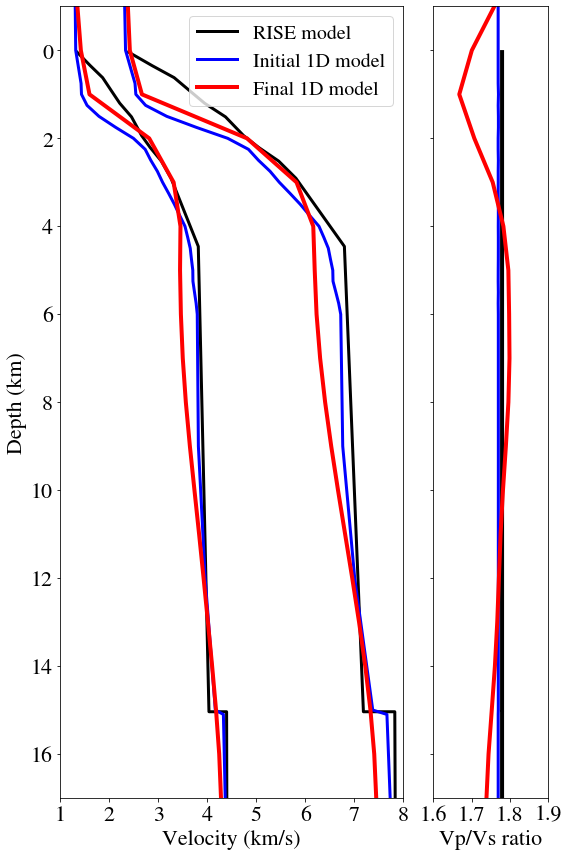

In [9]:
# Calculate Vp/Vs ratios

esme_df['Vp/Vs'] = esme_df['Vp'] / esme_df['Vs']
model = model_dict['NEW_sm_avg']
model['Vp/Vs'] = model['Vp'] / model['Vs']
rise_df['Vp/Vs'] = rise_df['Vp'] / rise_df['Vs']

# PLOT THE MODELS

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 12), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# VELOCITY MODELS

plt.rcParams['font.family'] = 'Nimbus Roman'


ax1.plot(rise_Vp, r_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, label="RISE model", color='black')
ax1.plot(rise_Vs, r_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, color='black')

ax1.plot(esme_Vp, e_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, label="Initial 1D model", color='blue')
ax1.plot(esme_Vs, e_depth, marker='o',markersize=0.11, linestyle='-', linewidth=3, color='blue')

cmodel = list_of_models[3]
ax1.plot(model_dict[cmodel]['Vp'], model_dict[cmodel]['depth'], linestyle='-', linewidth=4, label="Final 1D model", color="red")
ax1.plot(model_dict[cmodel]['Vs'], model_dict[cmodel]['depth'], linestyle='-', linewidth=4, color="red")


ax1.set_ylim(-1,17)
#ax1.set_title('Velocity models', fontsize=16)
ax1.invert_yaxis()
ax1.set_xlim(1,8)
ax1.set_xlabel('Velocity (km/s)', fontsize=22)
ax1.set_ylabel('Depth (km)', fontsize=22)

xtick_positions = np.linspace(1,8,8)
xtick_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels)

ax1.tick_params(axis='x', labelsize=22)
ax1.tick_params(axis='y', labelsize=22) 

ax1.legend(fontsize=20)

# Vp/Vs ratios

print(model)
ax2.plot(rise_df['Vp/Vs'], rise_df['depth'], linestyle='-', linewidth=4, label="RISE model", color="black")
ax2.plot(esme_df['Vp/Vs'], e_depth, marker='o',markersize=0.1, linestyle='-', linewidth=3, label="Esme's model", color='blue')
ax2.plot(model['Vp/Vs'], model['depth'], linestyle='-', linewidth=4, label="Final 1D model", color="red")


ax2.set_ylim(-1,17)
#ax1.set_title('Velocity models', fontsize=16)
ax2.invert_yaxis()
ax2.set_xlim(1.6,1.9)
ax2.set_xlabel('Vp/Vs ratio', fontsize=22)
#ax2.set_ylabel('Depth (km)', fontsize=22)

ax2.tick_params(axis='x', labelsize=22)
ax2.tick_params(axis='y', labelsize=22) 

xtick_positions = [1.6, 1.7, 1.8, 1.9]
xtick_labels = ['1.6', '1.7', '1.8', '1.9']

ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels)

fig.tight_layout()

fig.savefig('1Dmodels.png', facecolor='white', bbox_inches='tight')

fig.show()